In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

Предобработка данных

In [2]:
data = pd.read_csv('rko_film_19301941.csv', header = None)

In [3]:
header = ['Film', 'Re-release dummy', 'Production costs', 'Domestic Revenue', 'Foreign Revenue', 'Total Revenue', 'Profits', 'Distribution Cost', 'Dist Cost/Revenue', 'Dist Cost/Prod Cost', 'Year', '100*Profit/(Prod+dist cost)']

In [4]:
new_data = pd.DataFrame(columns = header)
for j in range(len(data)):  
    row = data[0][j].split()
    new_data.loc[j] = [' '.join(row[:len(row) - len(header) +1])] + row[len(row) - len(header) +1:]

In [5]:
new_data[header[1:]] = new_data[header[1:]].astype('float')

In [6]:
new_data.to_csv('rko_films.csv')

В качестве объясняющего фактороа выберем данные о бюджете на производство фильма в качестве целевого сборы фильма

In [7]:
new_data

,Film,Re-release dummy,Production costs,Domestic Revenue,Foreign Revenue,Total Revenue,Profits,Distribution Cost,Dist Cost/Revenue,Dist Cost/Prod Cost,Year,100*Profit/(Prod+dist cost)
0,STREET GIRL,0.0,211.0,806.0,198.0,1004.0,500.0,293.0,0.292,1.389,1930.0,99.2
1,VAGABOND LOVER,0.0,204.0,671.0,85.0,756.0,335.0,217.0,0.287,1.064,1930.0,79.6
2,SAINT IN NEW YO,0.0,128.0,350.0,310.0,460.0,195.0,137.0,0.298,1.070,1938.0,73.6
3,BACHELOR MOTHER,0.0,509.0,1170.0,805.0,1975.0,827.0,639.0,0.324,1.255,1939.0,72.0
4,TOP HAT,0.0,609.0,1782.0,1420.0,3202.0,1325.0,1268.0,0.396,2.082,1936.0,70.6
...,...,...,...,...,...,...,...,...,...,...,...,...
150,HITTING A NEW H,0.0,727.0,305.0,183.0,488.0,-431.0,192.0,0.393,0.264,1938.0,-46.9
151,TWO ALONE,0.0,236.0,125.0,39.0,164.0,-158.0,86.0,0.524,0.364,1934.0,-49.1
152,WOMAN COMANDS,0.0,415.0,186.0,56.0,242.0,-265.0,92.0,0.380,0.222,1932.0,-52.3
153,ABE LINCOLN IN,0.0,1004.0,535.0,131.0,666.0,-740.0,402.0,0.604,0.400,1940.0,-52.6


In [8]:
X = np.array(new_data['Production costs'])
Y = np.array(new_data['Total Revenue'])

Диаграмма рассеяния

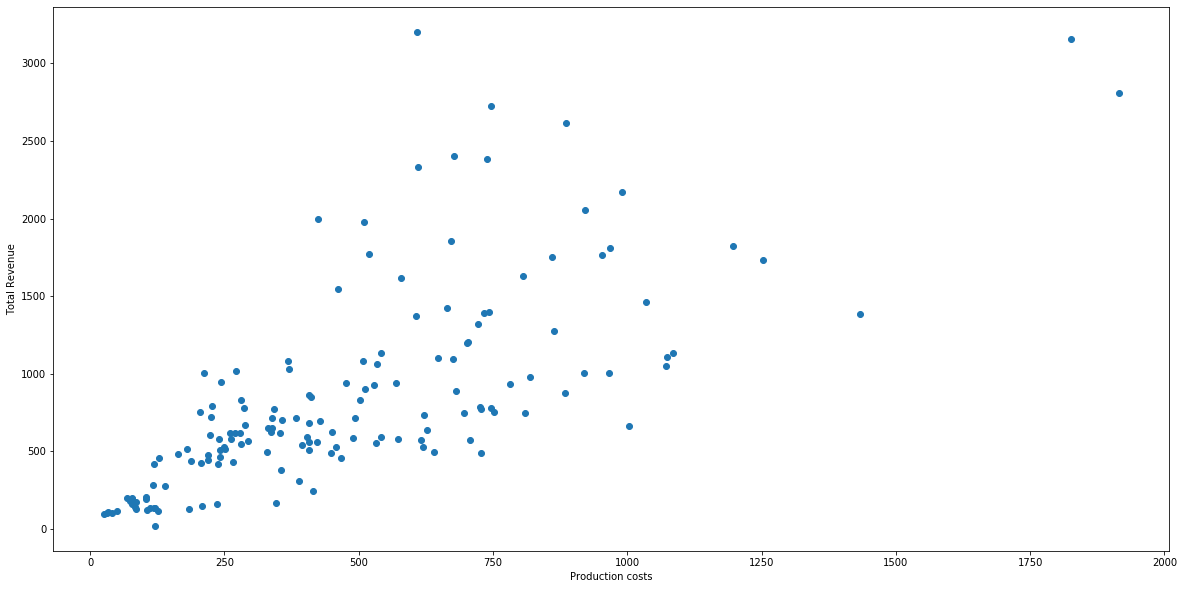

In [9]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_xlabel('Production costs')
ax.set_ylabel('Total Revenue')
plt.scatter(X,Y)

Построим линейную регрессию

In [10]:
reg = LinearRegression()
reg.fit(X.reshape(-1,1),Y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Получим коэф. регрессии

In [11]:
k , b = reg.coef_[0][0], reg.intercept_[0]
print('coef: ', k)
print('intercept: ',  b)

coef:  1.3929479698371794
intercept:  180.70336195139714


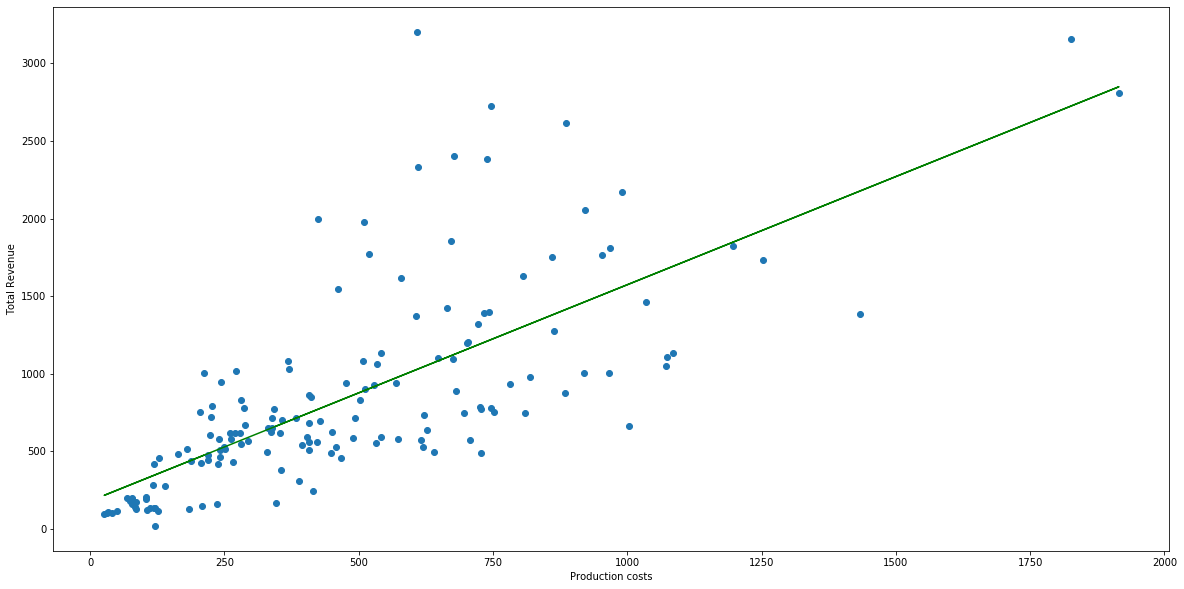

In [12]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_xlabel('Production costs')
ax.set_ylabel('Total Revenue')
plt.scatter(X,Y)
plt.plot(X, [k*x + b for x in X], color = 'g')

Построим остатки на диаграмме рассеиния

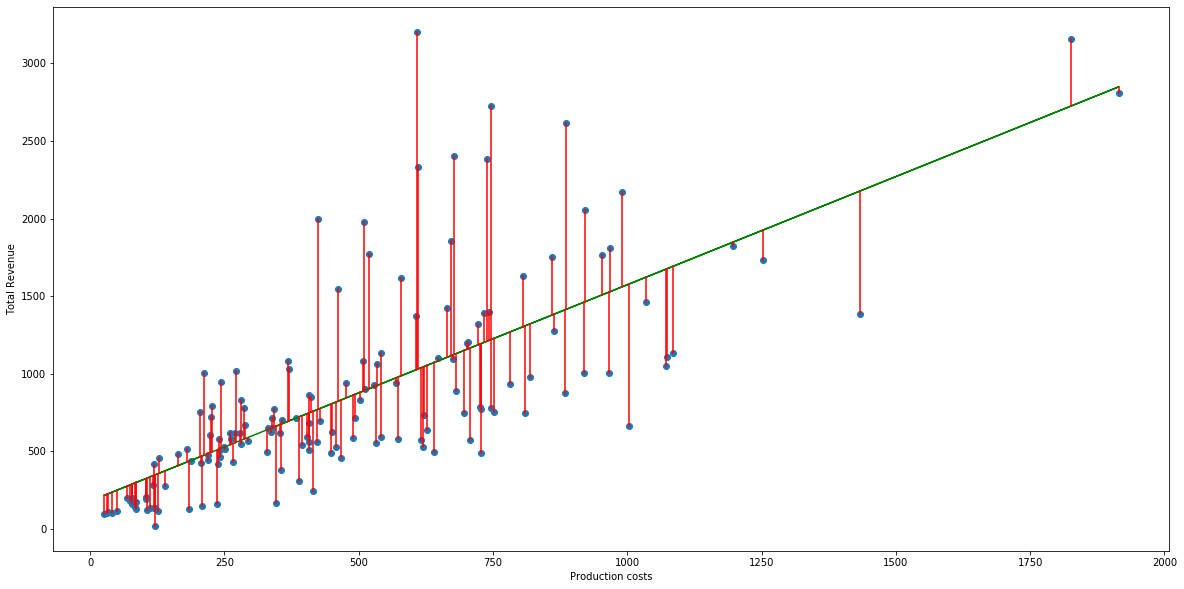

In [11]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_xlabel('Production costs')
ax.set_ylabel('Total Revenue')
plt.scatter(X,Y)
plt.plot(X, [k*x + b for x in X], color = 'g')
for i in range(len(X)):
    true_dots = (X[i], X[i])
    preds = (Y[i], k*X[i] + b)
    plt.plot(true_dots, preds, color = 'r')

In [13]:
X2 = sm.add_constant(X.reshape(-1,1))
est = sm.OLS(Y.reshape(-1,1), X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     166.6
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           3.01e-26
Time:                        22:54:16   Log-Likelihood:                -1165.2
No. Observations:                 155   AIC:                             2334.
Df Residuals:                     153   BIC:                             2341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        180.7034     63.129      2.862      0.0

Критерий Стьюдента

p_val_const == 0.05 => константное значение статестически значимо <br>

p_val_x1 < 0.05 => переменная стат. значима 

Критерий Фишера <br>
F_prob = 3.01e-26 < 0.05 => данное построенное уравнение ПЛР является статичтически значимым

Построим точечный прогноз значения y для фиксированного x. Вычислим стандартную ошибку и доверительный интервал полученного прогноза

In [14]:
est2.get_prediction(X2[0]).summary_frame()[['mean', 'mean_se','mean_ci_lower','mean_ci_upper']]

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,474.615384,46.278988,383.187063,566.043704


Оценим гомоскедастичность остатков

In [28]:
tail = Y -  [k*x + b for x in X]

In [35]:
_,_,f_val, p_val = het_breuschpagan(tail.reshape((-1,1)),X.reshape((-1,1)))

In [36]:
print('f_val: ', f_val, '\np_val: ', p_val)

f_val:  32.57272414480416 
p_val:  5.727437424062893e-08


p_val < 0.05 => остатки гомоскедастичны